In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 获取非线性数据集

In [2]:
from sklearn.datasets import make_moons

In [3]:
X,y = make_moons(noise = 0.15, random_state=666)

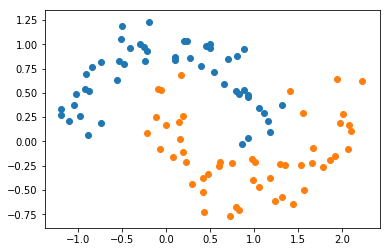

In [4]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

### 使用管道训练带有多项式特征的模型

In [5]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.svm import LinearSVC

In [6]:
from sklearn.pipeline import Pipeline

In [7]:
def getSVMwithMultiFeatures(degree,C=1.0):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("standard_scaler",StandardScaler()),
        ("svmClassifier",LinearSVC(C=C))
    ])

In [8]:
lin_svc = getSVMwithMultiFeatures(degree=3)

In [9]:
lin_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('standard_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svmClassifier', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

#### 可视化函数

In [10]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


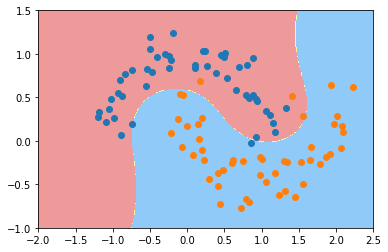

In [11]:
plot_decision_boundary(lin_svc,[-2,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

## SVM核函数简单使用

In [12]:
from sklearn.svm import SVC

In [13]:
def getSVMwithKernel(degree,C=1.0):
    return Pipeline([
        ("standard_scaler",StandardScaler()),
        ("svmClassifier",SVC(kernel="poly",degree=degree,C=C))
    ])

In [32]:
kernel_svc = getSVMwithKernel(3,2)

In [33]:
kernel_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('standard_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svmClassifier', SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


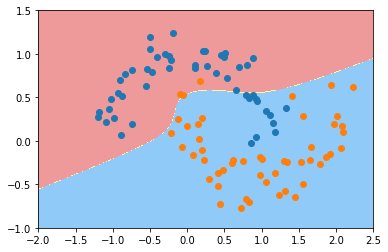

In [34]:
plot_decision_boundary(kernel_svc,[-2,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()